<a href="https://colab.research.google.com/github/MbogoriL/computer-vision/blob/main/Computer_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AfterWork Data Science: Age of a person from a photo

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Build and evaluate a model for verifying people's age

### b) Defining the Metric for Success

This project will be considered a success when we are able to confidently determine people's actual age from a photo so as not to sell alcohol to underage people 


### c) Understanding the Context 

The supermarket chain would like to explore whether Data Science can help them adhere to
alcohol laws by making sure they do not sell alcohol to people underage. You are asked to
conduct that evaluation, so as you set to work, keep the following in mind:
- The shops are equipped with cameras in the checkout area which are triggered when a
person is buying alcohol.
- Computer vision methods can be used to determine the age of a person from a photo.
- The task then is to build and evaluate a model for verifying people's age.
To start working on the task, you'll have a set of photographs of people with their ages indicated.


### d) Recording the Experimental Design

1. Load dataset and libraries.
2. Clean dataset.
3. Carry out univariate and bivariate analysis.
4. Determine the likely ages of persons 
5. Carry out data modeling.
6. Summarize findings.
7. Provide recommendations.
8. Challenge the solution.

### e) Data Relevance

The data provided is sufficient and appropriate for answering the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
!pip install tensorflow
!pip install opencv-python

     |████████████████████████████████| 462 kB 5.3 MB/s 


In [ ]:
#importing libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os, os.path
%matplotlib inline

In [ ]:
# The ImageDataGenerator class forms batches with images and class labels based on the photos in the folders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Colab files module

from google.colab import files
uploaded = files.upload()

Saving labels.csv to labels.csv


In [ ]:
labels = pd.read_csv('labels.csv')
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [ ]:
labels.shape

(7591, 2)

There are 7,591 records in the dataset

In [ ]:
labels.dtypes

file_name    object
real_age      int64
dtype: object

In [ ]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


The median age is 29, the youngest person is 1 and the maximum being 100

In [ ]:
image1 = labels.head()

In [ ]:
image = image1['file_name'].values
image


array(['000000.jpg', '000001.jpg', '000002.jpg', '000003.jpg',
       '000004.jpg'], dtype=object)

In [ ]:
len(image)

5

In [ ]:
# extract the images from zip files

!jar xvf images.zip

 inflated: images/007501.jpg
 inflated: images/007502.jpg
 inflated: images/007503.jpg
 inflated: images/007504.jpg
 inflated: images/007505.jpg
 inflated: images/007506.jpg
 inflated: images/007507.jpg
 inflated: images/007508.jpg
 inflated: images/007509.jpg
 inflated: images/007510.jpg
 inflated: images/007511.jpg
 inflated: images/007512.jpg
 inflated: images/007513.jpg
 inflated: images/007514.jpg
 inflated: images/007515.jpg
 inflated: images/007516.jpg
 inflated: images/007517.jpg
 inflated: images/007518.jpg
 inflated: images/007519.jpg
 inflated: images/007520.jpg
 inflated: images/007521.jpg
 inflated: images/007522.jpg
 inflated: images/007523.jpg
 inflated: images/007524.jpg
 inflated: images/007525.jpg
 inflated: images/007526.jpg
 inflated: images/007527.jpg
 inflated: images/007528.jpg
 inflated: images/007529.jpg
 inflated: images/007530.jpg
 inflated: images/007531.jpg
 inflated: images/007532.jpg
 inflated: images/007533.jpg
 inflated: images/007534.jpg
 inflated: ima

In [ ]:
# check the number of images
DIR  = 'images/'
files = os.listdir(DIR)
print(len(files))
files = sorted(files)
print(files[0],files[-1])

7591
000000.jpg 007612.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  if __name__ == '__main__':


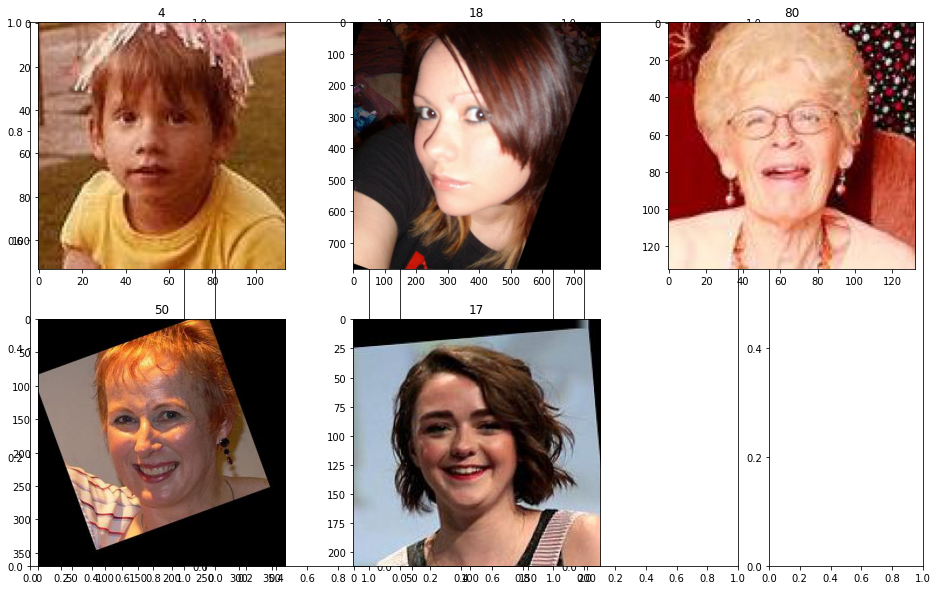

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=len(image),figsize=(4*4,5*2))
for i in range(0,len(image)):
    fig.add_subplot(2,3, i+1)
    image2 = Image.open(DIR + image[i])
    im = np.array(image2)
    plt.imshow(im)
    plt.title(str(image1['real_age'].values[i]))
    
plt.tight_layout() 
plt.show()


## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [ ]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


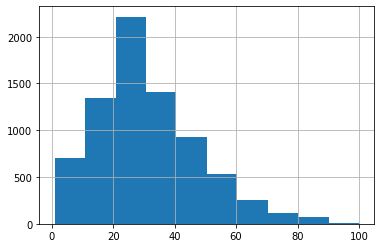

In [ ]:
labels.real_age.hist()
plt.show()

Most of the people are aged between 20 to 40 years old. 

### Data Modeling

In [ ]:
# splitting into 80-20 train-test sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(labels, test_size=0.2, random_state=42)
print(train_df.shape)
print(test_df.shape)

(6072, 2)
(1519, 2)


In [ ]:
# create datagenerator object for training and validation datasets
#rescale images using 1/255
train_datagen = ImageDataGenerator(
            rescale=1./255.,validation_split=0.25)


In [ ]:
#extract data from a folder, call the flow_from_directory() function
train_datagen_flow = train_datagen.flow_from_dataframe(
    # the folder with the dataset
    dataframe = train_df,
    directory = "images/",
    x_col="file_name", 
    y_col="real_age",
    subset="training",
    # the batch size
    batch_size=16,
    # the target image size
    target_size=(150, 150),
    # class mode
    class_mode="raw",
    # set a random number generator
    seed=12345,
    shuffle=True
)


Found 4554 validated image filenames.


In [ ]:
# previewing filenames
train_datagen_flow.filenames[:3]

['005561.jpg', '000489.jpg', '000493.jpg']

In [ ]:
validation_datagen_flow = train_datagen.flow_from_dataframe(
    # the folder with the dataset
    dataframe = train_df,
    directory = "images/",
    x_col="file_name", 
    y_col="real_age",
    subset="validation",
    # the batch size
    batch_size=16,
    # the target image size
    target_size=(150, 150),
    # class mode
    class_mode="raw",
    # set a random number generator
    seed=12345,
    shuffle=True
)

Found 1518 validated image filenames.


In [ ]:
# previewing filenames
validation_datagen_flow.filenames[:3]

['005546.jpg', '001554.jpg', '005513.jpg']

In [ ]:
# create datagenerator object for test datasets
test_datagen=ImageDataGenerator(rescale=1./255.)

test_datagen_flow=test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory="images/",
    x_col="file_name",
    y_col="real_age",
    batch_size=16,
    seed=12345,
    shuffle=False,
    class_mode="raw",
    target_size=(150,150)
)


Found 1519 validated image filenames.


In [ ]:
# previewing filenames
test_datagen_flow.filenames[:3]

['000800.jpg', '002644.jpg', '006525.jpg']

In [ ]:
#importing libraries
from tensorflow.keras import Sequential
from tensorflow.keras.applications.resnet import ResNet50
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
# ANN model using ResNet architecture

# initialize the model
model = Sequential()

# we will use ResNet50 architecture, with freezing top layers
backbone = ResNet50(input_shape=(200,200,3), weights='imagenet', include_top=False)
model.add(backbone)

# reduce the number of the model's parameters using Global Average Pooling
model.add(GlobalAveragePooling2D())
# Add Dropout regularization functions to hidden layers in order to prevent overfitting
model.add(Dropout(0.25))

# output layer
# since we are doing regression we will add only one neuron (unit)
model.add(Dense(units = 1,activation='relu'))

# The Adam algorithm makes stride selection automatic. 
# It selects different parameters for different neurons, which speeds up model training.
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [ ]:
load_train=len(train_datagen_flow)
load_valid=len(validation_datagen_flow)
load_test=len(test_datagen_flow)

In [ ]:
# fitting the model
model.fit(train_datagen_flow,
          steps_per_epoch=load_train,
          validation_data=validation_datagen_flow,
          validation_steps=load_valid,
          epochs=10
)

Epoch 1/10
285/285 [==============================] - 104s 298ms/step - loss: 260.9150 - mean_squared_error: 260.9150 - val_loss: 872.0813 - val_mean_squared_error: 872.0813
Epoch 2/10
285/285 [==============================] - 81s 285ms/step - loss: 83.2085 - mean_squared_error: 83.2085 - val_loss: 239.9702 - val_mean_squared_error: 239.9702
Epoch 3/10
285/285 [==============================] - 81s 285ms/step - loss: 49.4159 - mean_squared_error: 49.4159 - val_loss: 115.0873 - val_mean_squared_error: 115.0873
Epoch 4/10
285/285 [==============================] - 81s 282ms/step - loss: 35.7395 - mean_squared_error: 35.7395 - val_loss: 120.2183 - val_mean_squared_error: 120.2183
Epoch 5/10
285/285 [==============================] - 80s 281ms/step - loss: 28.0448 - mean_squared_error: 28.0448 - val_loss: 97.3191 - val_mean_squared_error: 97.3191
Epoch 6/10
285/285 [==============================] - 80s 282ms/step - loss: 21.9274 - mean_squared_error: 21.9274 - val_loss: 105.3573 - val_me

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
# evaluate the model
model.evaluate(validation_datagen_flow,steps=load_test)

95/95 [==============================] - 13s 132ms/step - loss: 89.6745 - mean_squared_error: 89.6745


[89.67449951171875, 89.67449951171875]

In [ ]:
# Predictions
test_datagen_flow.reset()
predicted_age = model.predict(test_datagen_flow,steps=load_test,verbose=1)

95/95 [==============================] - 13s 133ms/step


In [ ]:
predicted_age[:5]

array([[ 2.285533],
       [38.35594 ],
       [29.67691 ],
       [17.39073 ],
       [37.21174 ]], dtype=float32)

In [ ]:
# Evaluating our model

real_ages = test_df.iloc[:, 1:].values
real_ages[:5]

array([[ 1],
       [46],
       [35],
       [23],
       [47]])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = np.sqrt(mean_squared_error(real_ages, predicted_age))
rmse

8.74078717238558

## <font color='#2F4F4F'>5. Summary of Findings</font>

Using ResNet50 architecture, the ANN model has an RMSE of 8.7  



## <font color='#2F4F4F'>6. Recommendations</font>


The supermarket can use the model to determine the age so as not to sell to underage customers 


## <font color='#2F4F4F'>7. Challenging your Solution</font>


#### a) Did we have the right question?
Yes we had the right data 

#### b) Did we have the right data?
Yes we did 

#### c) What can be done to improve the solution?

- optimize the epochs 
- optimize no of layes


